## Abbildung 1: Vergleich der Publikationen von und über Ehrlich, Marx, Weber und Luhmann. 

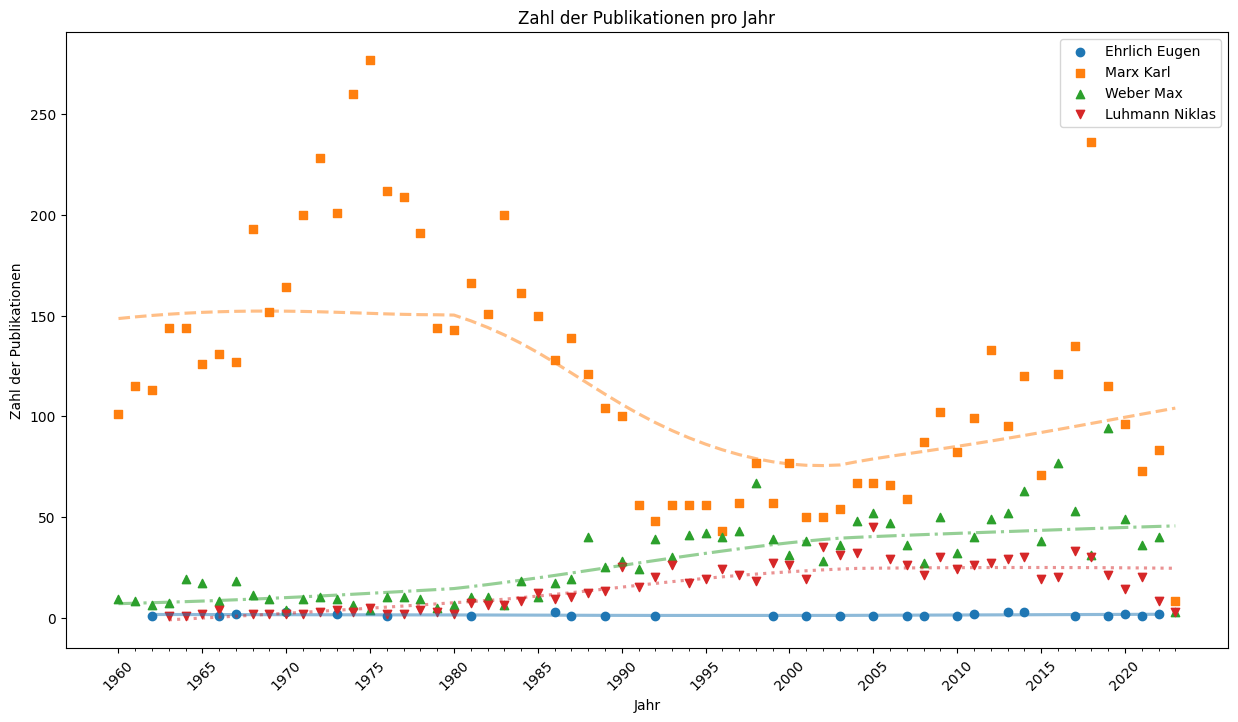

In [1]:
from scripts.dnb_data import compare_persons, plot_comparison
persons = ['Ehrlich Eugen', 'Marx Karl', 'Weber Max', 'Luhmann Niklas']
yearly_counts = compare_persons(persons, 1960, 2023)
plot_comparison(yearly_counts, lang="de", filename="01-dnb-ehrlich-marx-weber-luhmann.png")

## Abbildung 2: „Eugen Ehrlich“ im Google NGram Viewer, Korpus Englisch (2019)

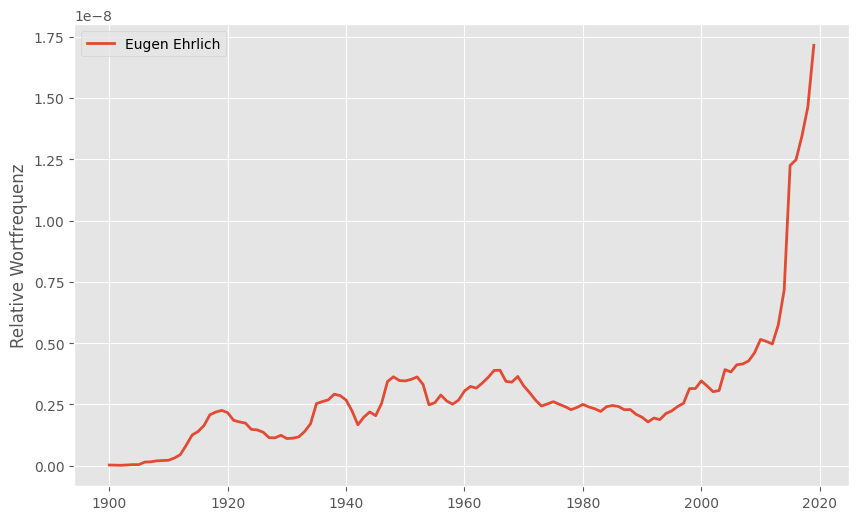

In [3]:
from lib.google_ngram import plot
plot(ylabel="Relative Wortfrequenz",
     file="docs/02-google-ngram-ehrlich-en-1900-2019.png",
     content='Eugen Ehrlich',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='en-2019')

## Abbildung 3 „Eugen Ehrlich“ im Google NGram Viewer, Korpus German (2019)

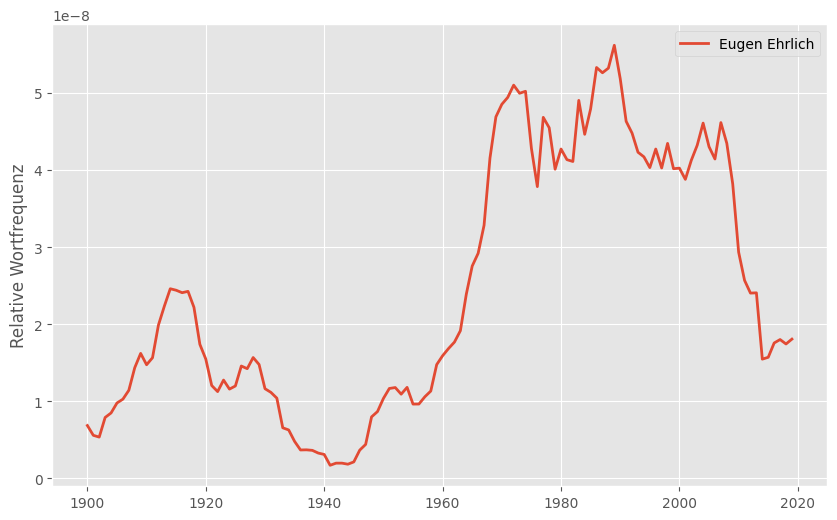

In [4]:
from lib.google_ngram import plot
plot(ylabel="Relative Wortfrequenz",
     file="docs/03-google-ngram-ehrlich-de-1900-2019.png",
     content='Eugen Ehrlich',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='de-2019')

## Abbildung 4: Rechtssoziologie-Klassiker im Korpus German (2019)

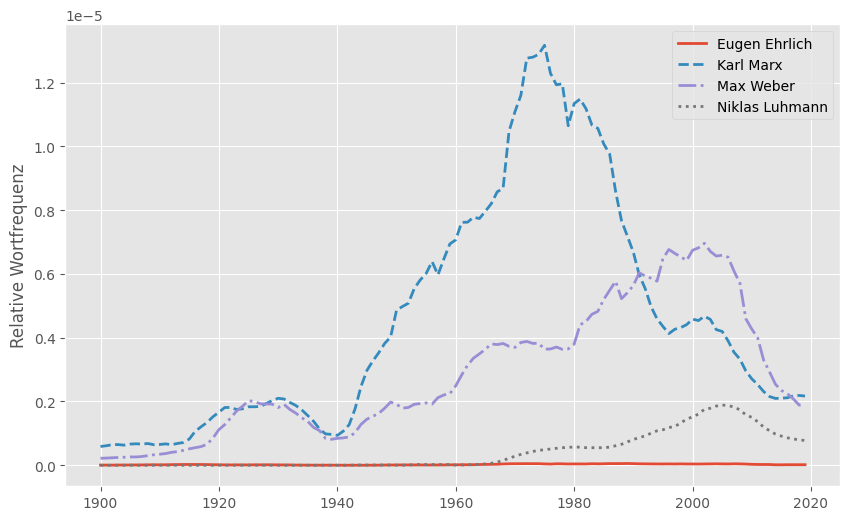

In [5]:
from lib.google_ngram import plot
plot(ylabel="Relative Wortfrequenz",
     file="docs/04-google-ngram-marx-ehrlich-weber-luhmann-de-1900-2019.png",
     content='Eugen Ehrlich,Karl Marx,Max Weber,Niklas Luhmann',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='de-2019')

## Abbildung 5: Rechtssoziologie-Klassiker im Korpus English (2019)

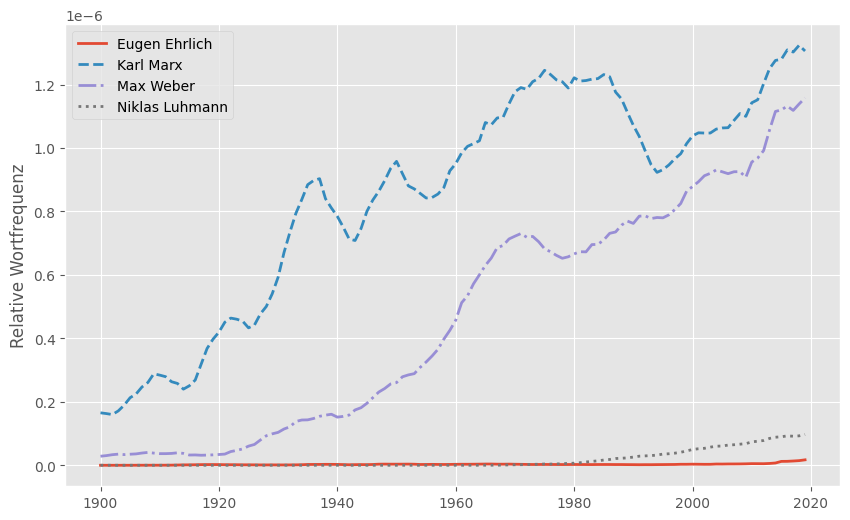

In [6]:
from lib.google_ngram import plot
plot(ylabel="Relative Wortfrequenz",
     file="docs/05-google-ngram-marx-ehrlich-weber-luhmann-en-1900-2019.png",
     content='Eugen Ehrlich,Karl Marx,Max Weber,Niklas Luhmann',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='en-2019')

## Abbildung 6: Zitierungen Ehrlichs, aggregiert nach Zeitschrift/Verlag 

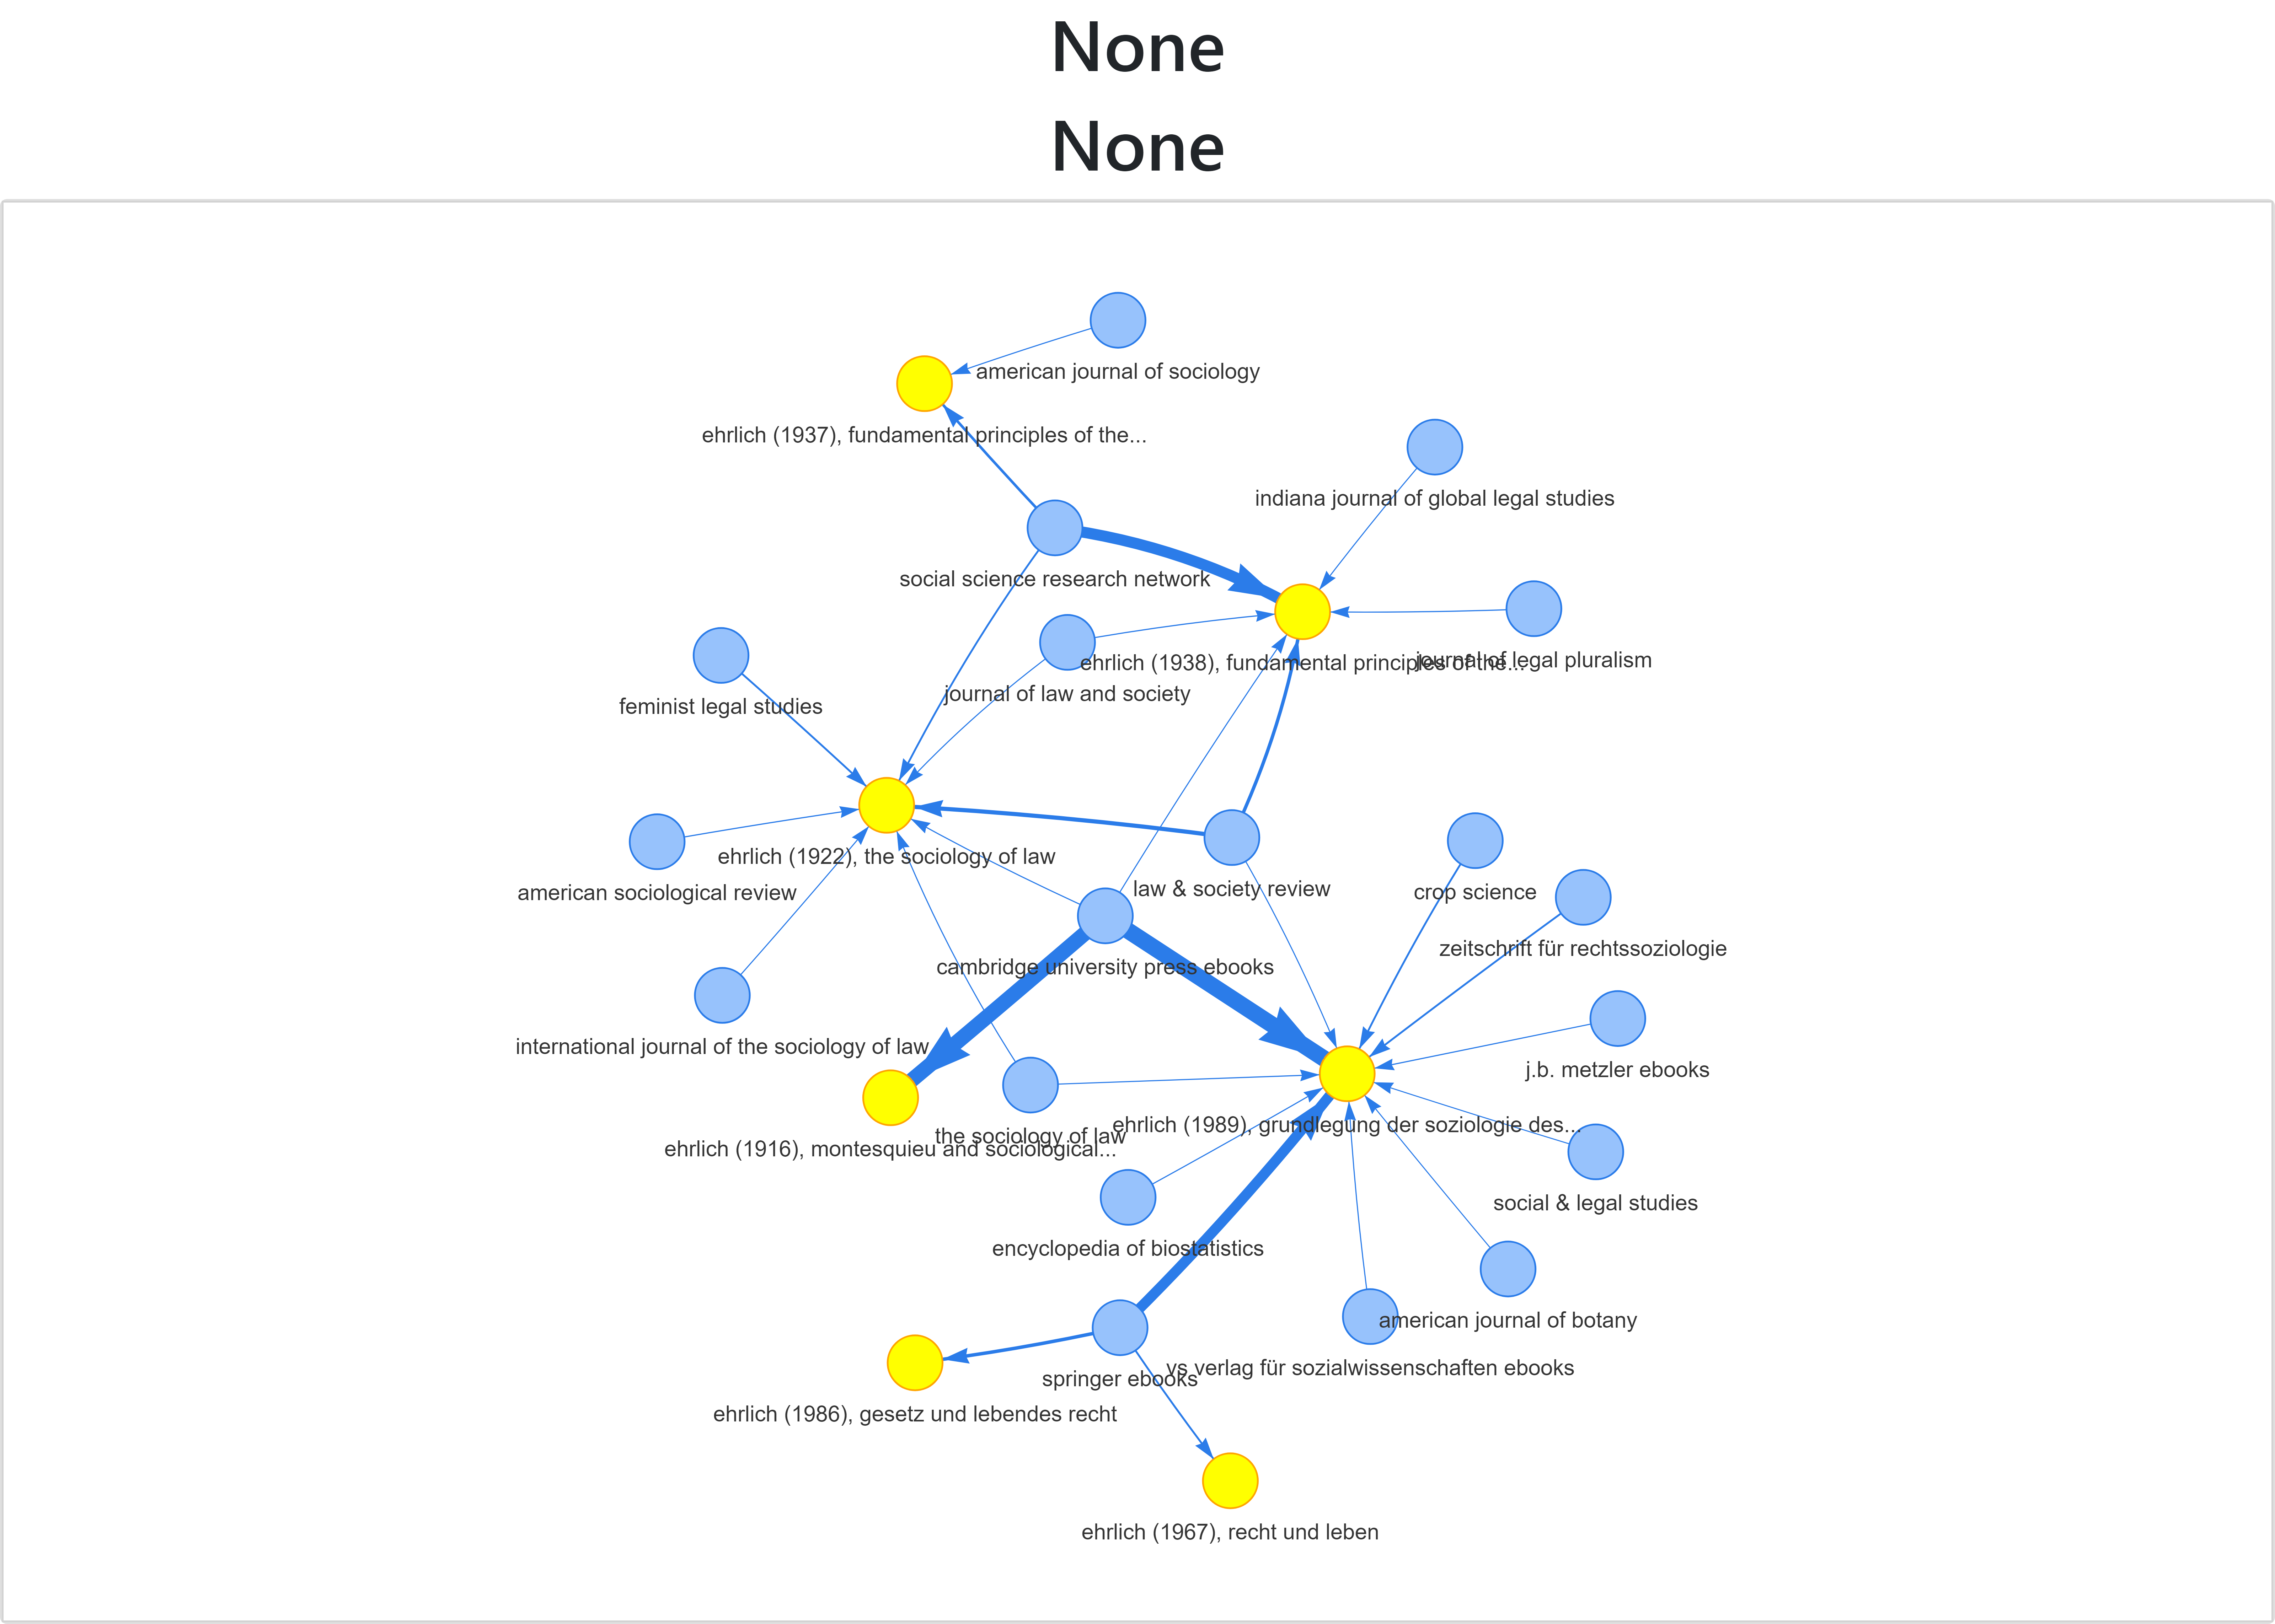

In [7]:
query = """
MATCH (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)-[r3:PUBLISHED_IN]-(v1:Venue)
WHERE a1.display_name = "ehrlich, eugen"
with w1, v1, count(r2) as num_citations
where num_citations > 1
RETURN  v1 AS source_node,
        apoc.create.vRelationship(v1, 'CITATIONS', {value:num_citations}, w1) as rel,
        w1 as target_node
"""
from scripts.utils import get_graph
from scripts.pyvis import create_or_update_network, draw_network

graph = get_graph("ehrlich-openalex")
net = create_or_update_network(graph, query, width="800px", height="800px")
file = "docs/06-venues-citing-ehrlich.html"
draw_network(net, file=file, screenshot=True)

## Abbildung 7: Relative Frequenz rechtssoziologischer Klassiker im ZfRsoz-Korpus

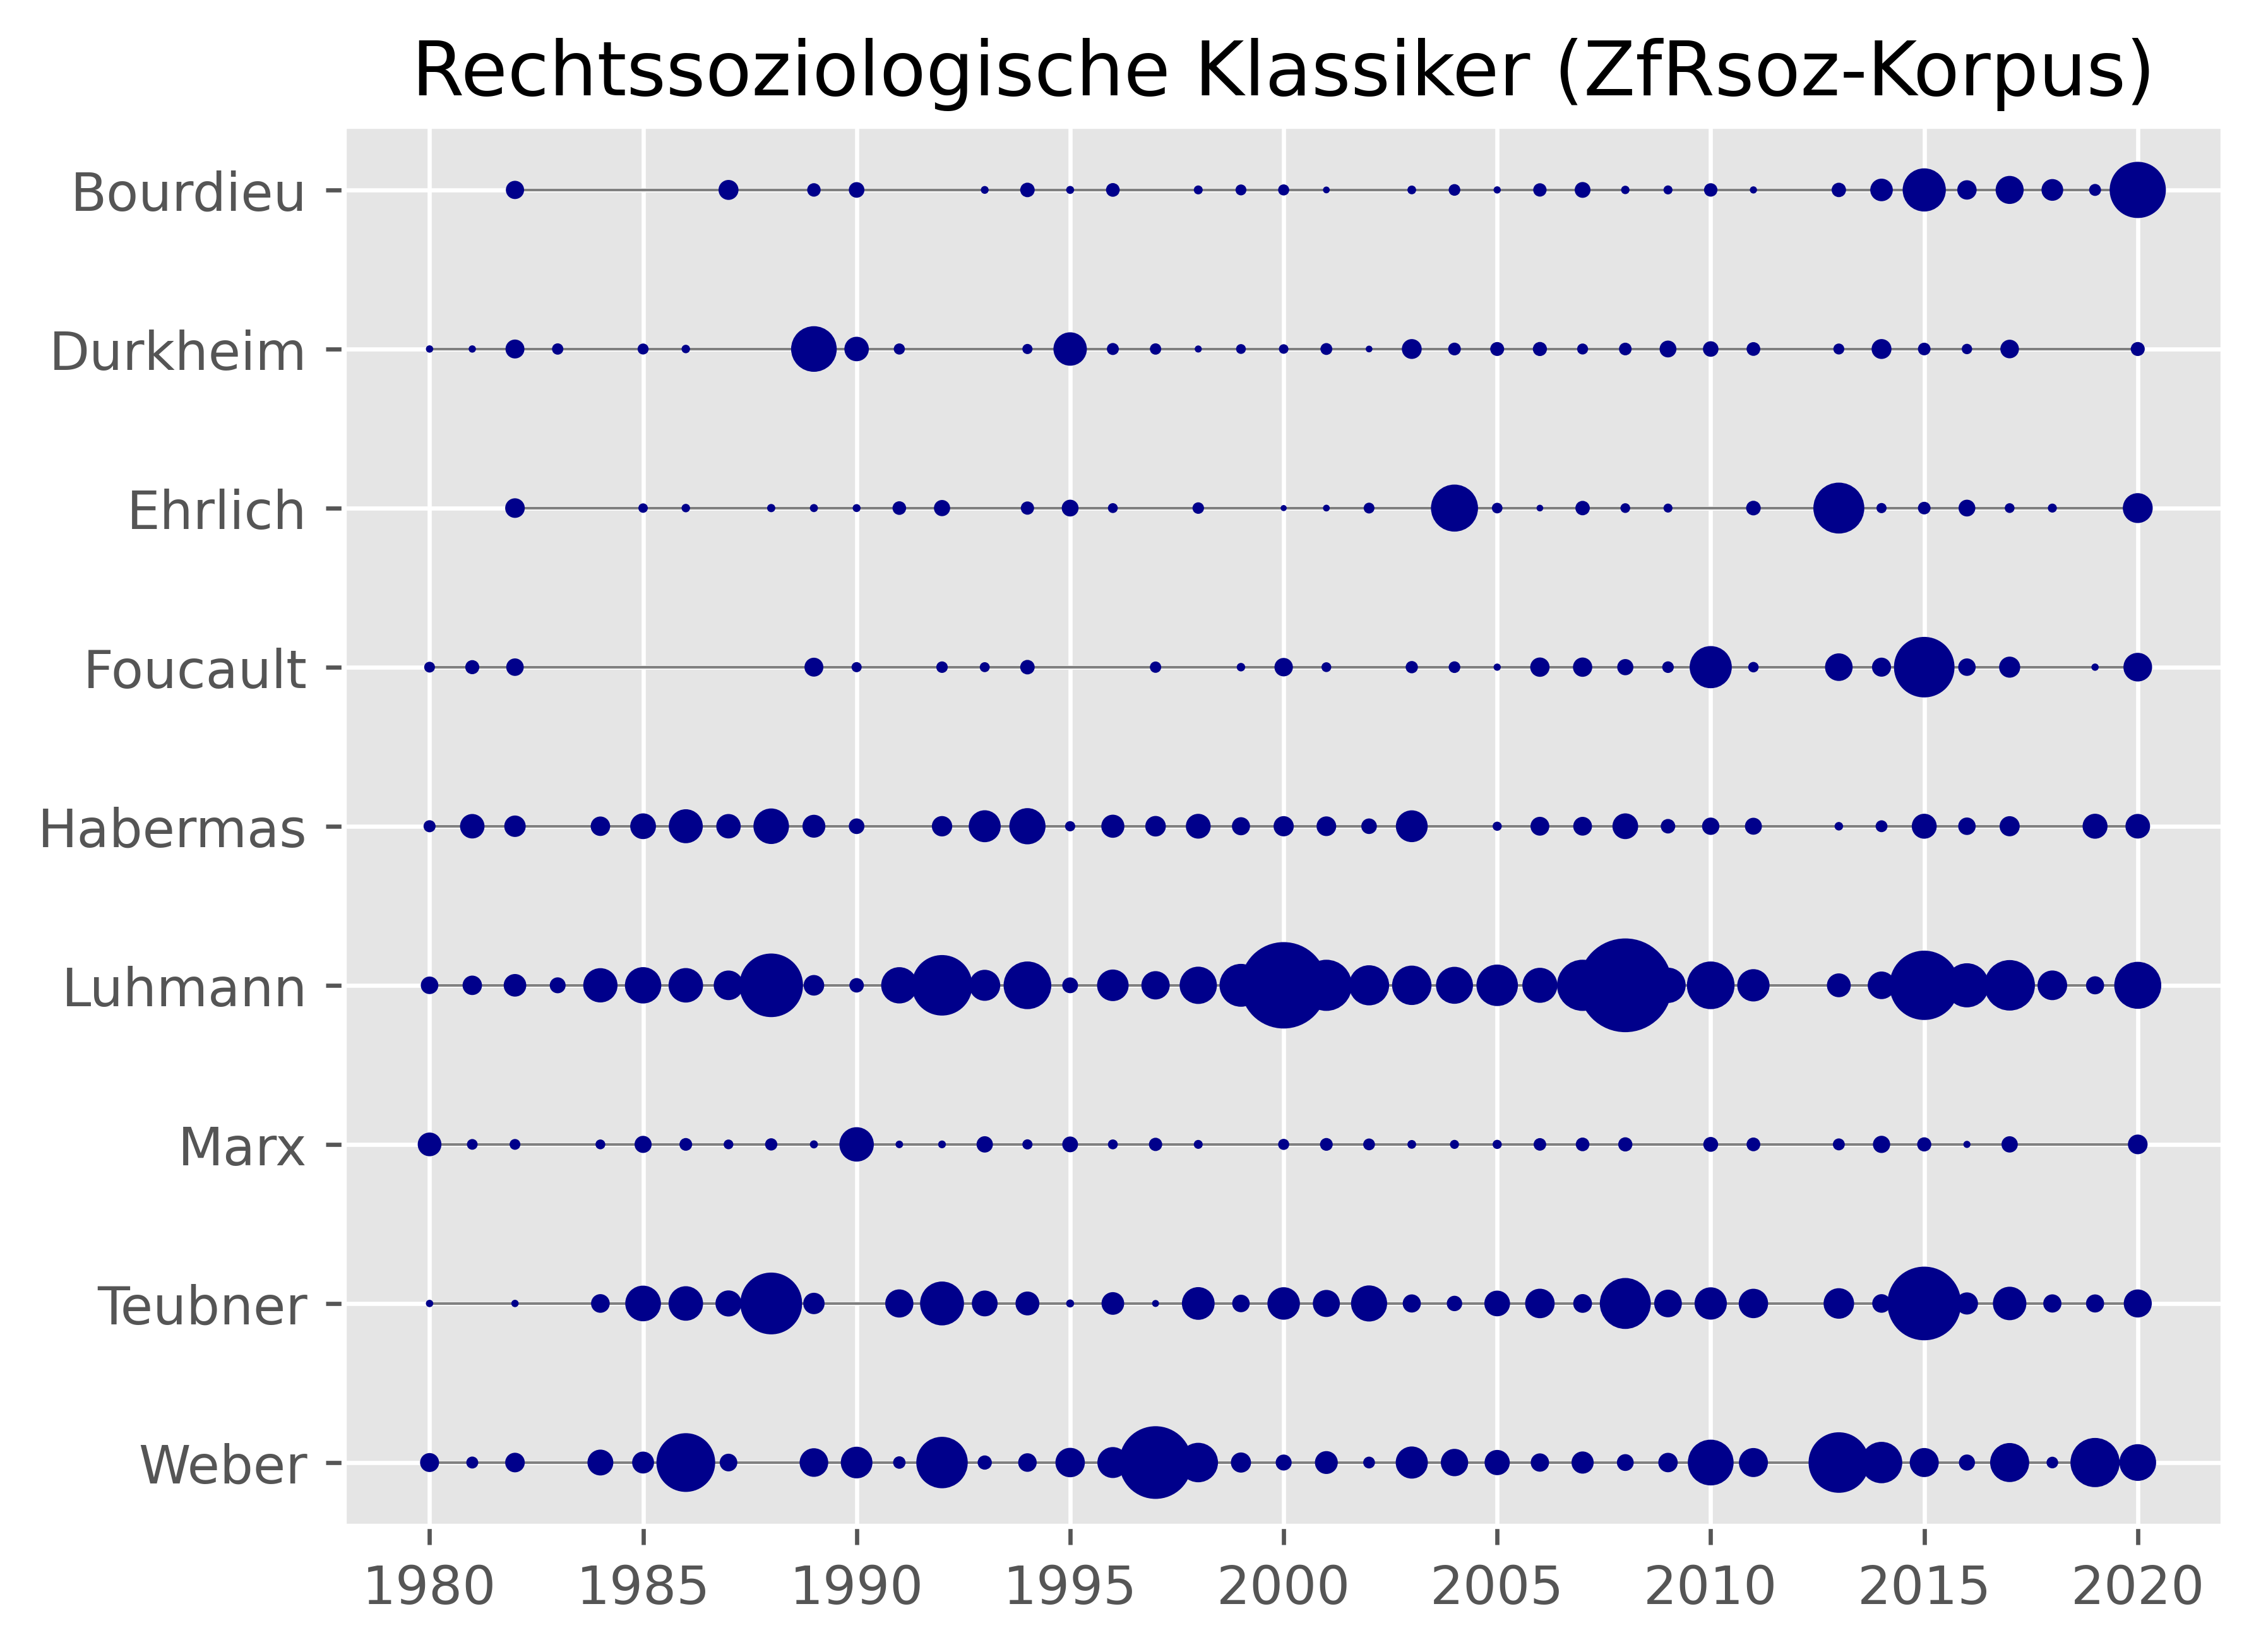

In [8]:
from scripts.utils import create_cached_corpus
from scripts.occurrence_by_year_scatter import prepare_data, plot_by_year
corpus = create_cached_corpus("zfrsoz")
search_terms = [r'Bourdieu',r'Durkheim', r'Ehrlich',r'Foucault', r'Habermas',r'Luhmann','Marx','Teubner', 'Weber']
search_terms.reverse()
plot_by_year(prepare_data(corpus, search_terms),
             title="Rechtssoziologische Klassiker (ZfRsoz-Korpus)",
             dpi=600, file="docs/07-zfrsoz-socio-legal-classics-ts.png")

## Abbildung 8: Relative Frequenz rechtssoziologischer Klassiker im ZfRsoz-Korpus

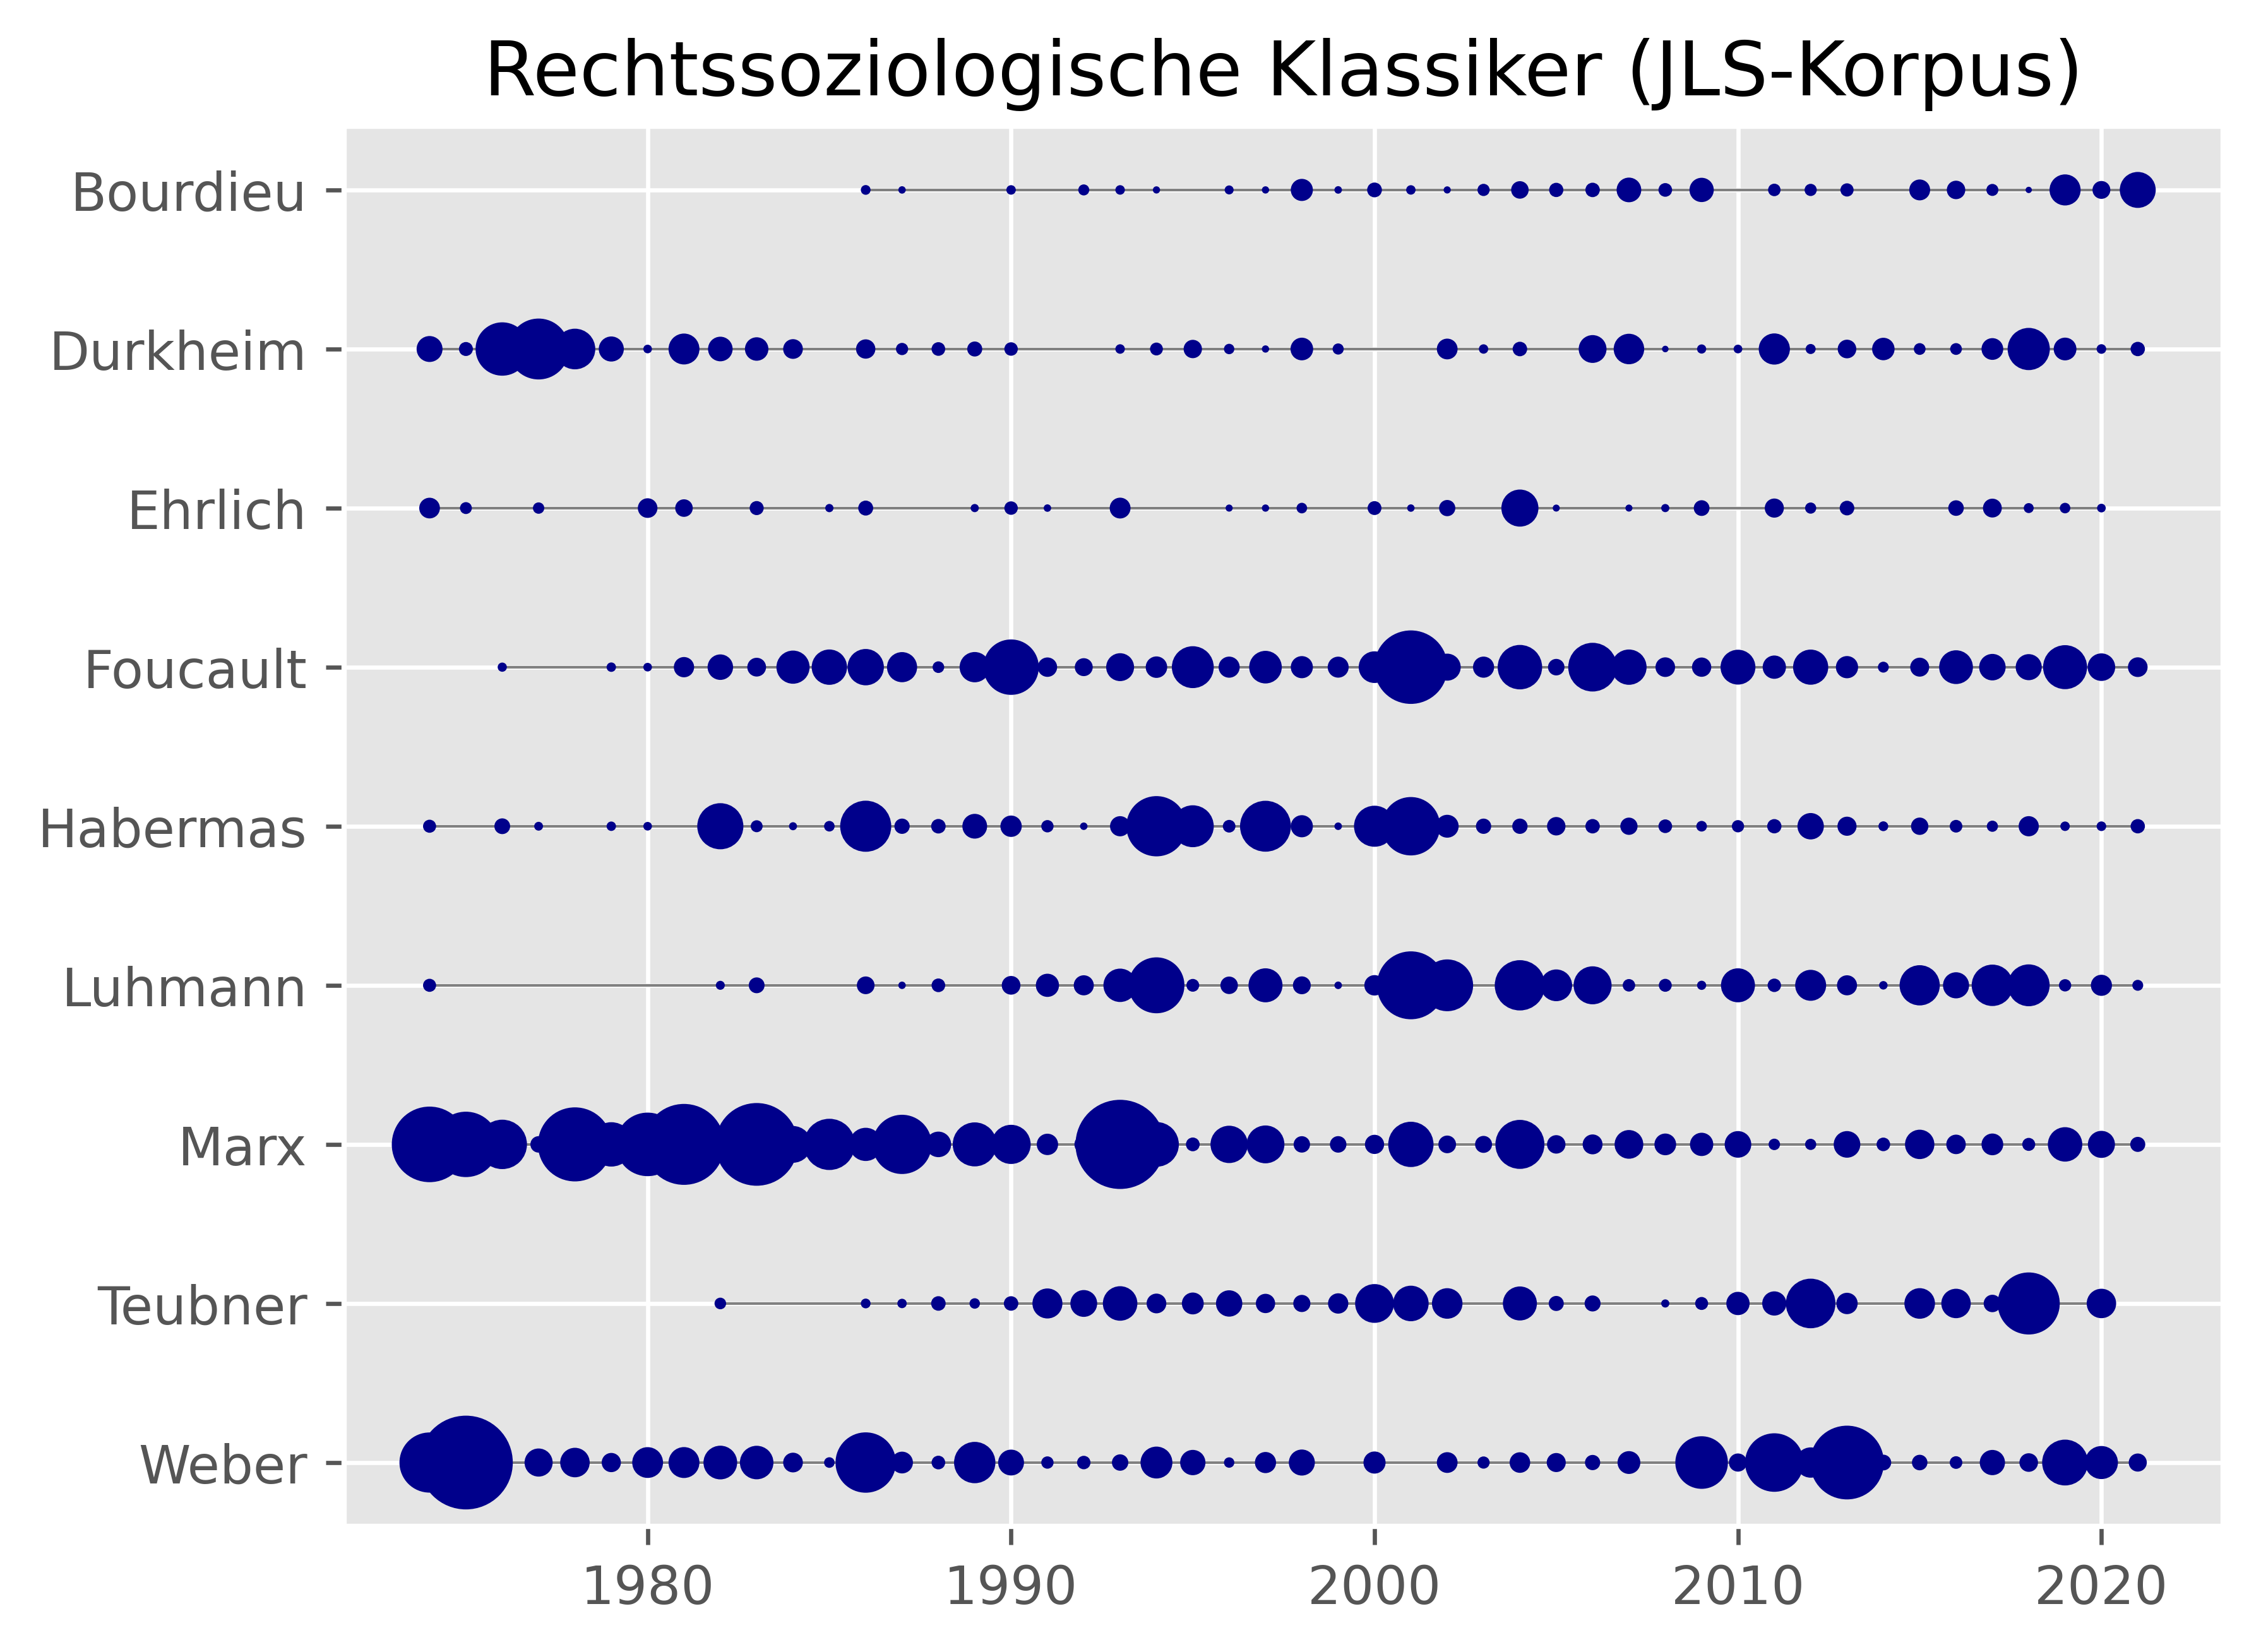

In [9]:
from scripts.utils import create_cached_corpus
from scripts.occurrence_by_year_scatter import prepare_data, plot_by_year
corpus = create_cached_corpus("jls")
search_terms = [r'Bourdieu',r'Durkheim', r'Ehrlich',r'Foucault', r'Habermas',r'Luhmann','Marx','Teubner', 'Weber']
search_terms.reverse()
data = prepare_data(corpus, regex_list=search_terms)
plot_by_year(data,
             title="Rechtssoziologische Klassiker (JLS-Korpus)",
             dpi=600,
             file="docs/08-jls-socio-legal-classics-ts.png")

## Abbildung 9: Nennung von „Ehrlich“ und „lebendem Recht“ im Korpus der Zeitschrift für Rechtssoziologie

Analyzing article corpus:   0%|          | 0/725 [00:00<?, ?it/s]

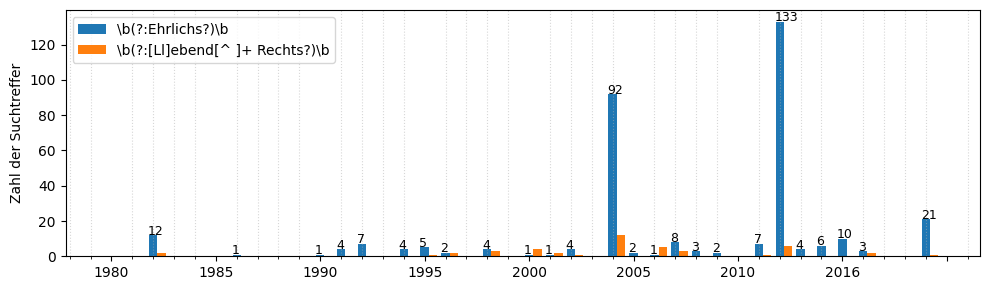

In [4]:
from scripts.utils import create_corpus, get_corpus_dir
from scripts.occurrence_by_year import plot_occurrences, save_occurrences
regex_list = [r'\b(?:Ehrlichs?)\b', r'\b(?:[Ll]ebend[^ ]+ Rechts?)\b']
corpus = create_corpus(get_corpus_dir('FULLTEXTS/ZFRSOZ/zfrsoz-txt'))
corpus = corpus.loc[corpus['author'] != 'Smaus'] # manual correction of false positive
save_occurrences(corpus, regex_list, "data/zfrsoz-articles-occurrences.xlsx")
plt = plot_occurrences(corpus, regex_list, y_label='Zahl der Suchtreffer', plot_style="default", bar_color_palette="tab10", figsize=(10,3))
plt.savefig('docs/09-zfrsoz-tf-ehrlich', dpi=600, bbox_inches='tight')
plt.show()

## Abbildung 10: Nennungen von „Ehrlich“ und „Living Law“ im Journal of Law and Society

Analyzing article corpus:   0%|          | 0/1650 [00:00<?, ?it/s]

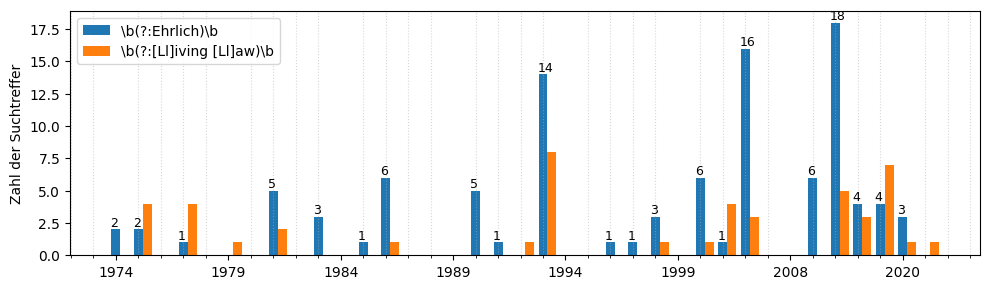

In [2]:
from scripts.utils import create_corpus, get_corpus_dir, DOICache
from scripts.occurrence_by_year import plot_occurrences, save_occurrences
regex_list = [r'\b(?:Ehrlich)\b', r'\b(?:[Ll]iving [Ll]aw)\b']
doi_cache = DOICache("data/jls-doi-to-year.csv")
corpus = create_corpus(get_corpus_dir('FULLTEXTS/JLS/jls-txt'))
corpus = corpus.loc[corpus['author'] != 'Veljanovski'] # manual correction of false positive
corpus = corpus.loc[corpus['author'] != 'Ogus'] # manual correction of false positive
corpus['author'] = corpus['author'].replace("Tamanha","Tamanaha") # error in DOI metadata
save_occurrences(corpus, regex_list, "data/jls-articles-occurrences.xlsx")
plt = plot_occurrences(corpus, regex_list, y_label='Zahl der Suchtreffer', plot_style="default", bar_color_palette="tab10", figsize=(10,3))
plt.savefig('docs/10-jls-tf-ehrlich', dpi=600, bbox_inches='tight')
plt.show()

## Abbildung 11: Okkurrenzanalyse "Ehrlich", "lebend* Recht" in Rechtssoziologielehrbüchern 1964–1989

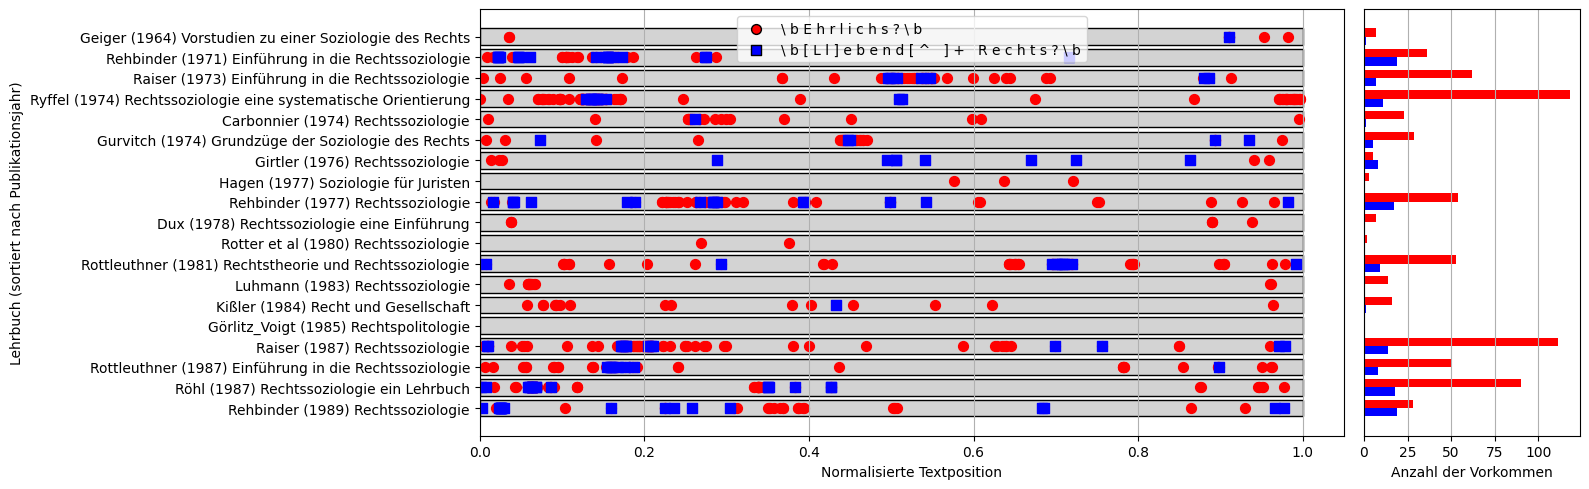

In [5]:
from scripts.occurrence_within_work import plot_occurrences, create_corpus
regex_list = [r'\bEhrlichs?\b', r'\b[Ll]ebend[^ ]+ Rechts?\b']
corpus = create_corpus("CORPORA/rsoz-lehrbuecher")
plt1 = plot_occurrences(corpus, regex_list,
                        x_label="Normalisierte Textposition",
                        y_label="Lehrbuch (sortiert nach Publikationsjahr)",
                        barchart_label="Anzahl der Vorkommen")
plt1.savefig('docs/11-rsoz-lehrbuecher-ehrlich.png', dpi=600, bbox_inches='tight')
plt1.show()

## Abbildung 12: Meistzitierte Werke Ehrlichs und Sekundärliteratur in Rechtssoziologie-Lehrbüchern, 1960–1989.

In [8]:
from scripts.utils import get_graph, df_to_nice_html
query = """
MATCH (citing_author:Author)-[:CREATOR_OF]->(citing_work:Work)-[citation:CITES]->(cited_work:Work)<-[:CREATOR_OF]-(cited_author:Author)
where (tolower(cited_author.display_name) starts with "ehrlich, e"
    or tolower(cited_work.title) contains "eugen ehrlich")
    //AND citing_work.year > 1960 and citing_work.year < 1990
WITH citing_author,
    collect(distinct citing_work) AS citing_works,
    collect(distinct cited_work) AS cited_works,
    count(citation) as num_citations
ORDER BY num_citations DESC
call {
    with citing_works
    unwind citing_works as citing_work
    MATCH (citing_work)-[citation:CITES]->(cited_work:Work)
    with citing_work, count(citation) as num_citations
    ORDER BY num_citations DESC
    LIMIT 1
    return citing_work as most_citing_work
}
call {
    with cited_works
    unwind cited_works as cited_work
    MATCH (citing_work:Work)-[citation:CITES]->(cited_work)<-[:CREATOR_OF]-(cited_author:Author)
    where tolower(cited_author.display_name) starts with "ehrlich, e"
    with cited_work, count(citation) as num_citations
    ORDER BY num_citations DESC
    return collect(cited_work) as most_cited_works_ehrlich
}
call {
    with cited_works
    unwind cited_works as cited_work
    MATCH (citing_work:Work)-[citation:CITES]->(cited_work)<-[:CREATOR_OF]-(cited_author:Author)
    where tolower(cited_work.title) contains "eugen ehrlich"
  //      and not tolower(cited_author.display_name) starts with "ehrlich, e"
    with cited_work, count(citation) as num_citations
    ORDER BY num_citations DESC
    return collect(cited_work) as most_cited_works_second_lit
}
RETURN citing_author.display_name AS Author,
    size(citing_works) as `Citing works`,
    most_citing_work.display_name AS `Most citing work`,
    size(most_cited_works_ehrlich) as `Cited works (Ehrlich)`,
    coalesce(most_cited_works_ehrlich[0].display_name, '') AS `Most cited (Ehrlich)`,
    size(most_cited_works_second_lit) as `Cited works (Second. lit.)`,
    coalesce(most_cited_works_second_lit[0].display_name, '') as `Most cited (Second. lit.)`
order by num_citations desc
limit 10
"""
graph = get_graph("rsoz-lehrbuecher")
df = graph.run(query).to_data_frame()
df_to_nice_html(df, file='docs/12-rsoz-lehrbuecher-ehrlich-most-cited.html')
df

Author  Citing works  \
0         raiser, th             3   
1      rehbinder, m.             2   
2        röhl, klaus             1   
3   rottleuthner, h.             1   
4        girtler, r.             1   
5        luhmann, n.             1   
6            dux, g.             1   
7  gurvitch, georges             1   
8         ryffel, h.             1   
9     carbonnier, j.             1   

                                    Most citing work  Cited works (Ehrlich)  \
0                    raiser (1987): rechtssoziologie                      5   
1                 rehbinder (1989): rechtssoziologie                      9   
2         röhl (1987): rechtssoziologie ein lehrbuch                      6   
3  rottleuthner (1987): einführung in die rechtss...                      5   
4                   girtler (1976): rechtssoziologie                      5   
5                   luhmann (1983): rechtssoziologie                      2   
6       dux (1978): rechtssoziologie eine einführung                      2   
7  gurvitch (1974): grundzüge der soziologie des ...                      3   
8  ryffel (1974): rechtssoziologie. eine systemat...                      1   
9                carbonnier (1974): rechtssoziologie                      0   

                                Most cited (Ehrlich)  \
0  ehrlich (1967): grundlegung der soziologie des...   
1  ehrlich (1967): grundlegung der soziologie des...   
2  ehrlich (1967): grundlegung der soziologie des...   
3                    ehrlich (1967): recht und leben   
4  ehrlich (1967): grundlegung der soziologie des...   
5  ehrlich (1967): grundlegung der soziologie des...   
6  ehrlich (1967): grundlegung der soziologie des...   
7  ehrlich (1913): grundlegung der soziologie des...   
8  ehrlich (1903): freie rechtsfindung und freie ...   
9                                                      

   Cited works (Second. lit.)  \
0                           4   
1                           1   
2                           4   
3                           1   
4                           1   
5                           1   
6                           1   
7                           0   
8                           1   
9                           1   

                           Most cited (Second. lit.)  
0  rehbinder (1967): die begründung der rechtssoz...  
1  rehbinder (1986): die begründung der rechtssoz...  
2  rehbinder (1967): die begründung der rechtssoz...  
3  rehbinder (1967): die begründung der rechtssoz...  
4  rehbinder (1967): die begründung der rechtssoz...  
5  rehbinder (1967): die begründung der rechtssoz...  
6  rehbinder (1967): die begründung der rechtssoz...  
7                                                     
8  rehbinder (1967): die begründung der rechtssoz...  
9  rehbinder (1967): die begründung der rechtssoz...

## Abbildung 13: Zitationsnetzwerk von Werken Ehrlichs im Lehrbücher-Korpus

In [ ]:
from scripts.pyvis import create_or_update_network, draw_network, cleanup
from scripts.utils import get_graph
# The first query constructs the graph and scales the node size according to
# he number of incoming and outgoing citations
query1 = """
MATCH (a:Author)-[r1:CREATOR_OF]->(w1:Work)
WHERE tolower(a.display_name) starts with "ehrlich, e"
OPTIONAL MATCH (w2:Work)-[r2:CITES]->(w1)
CALL {
    WITH w1
    MATCH (w1)<-[c:CITES]-(:Work)
    WITH w1, count(c) AS citationCount
    SET w1.vis_shape = "square"
    SET w1.vis_group = "cited"
    SET w1.vis_value = citationCount
}
WITH w2, collect(r2) AS r2s
CALL {
    WITH w2, r2s
    WITH w2, size(r2s) AS r2Count
    SET w2.vis_group = "citing"
    SET w2.vis_value = r2Count
}
unwind r2s as r2
with w2, r2
MATCH (a:Author)-[r1:CREATOR_OF]->(w1:Work)
WHERE tolower(a.display_name) starts with "ehrlich, e"
RETURN w1, w2, r2
"""
graph = get_graph("rsoz-lehrbuecher")
net = create_or_update_network(graph, query1, height="1000px", seed=9)
draw_network(net,file="docs/13-rsoz-lehrbuecher-ehrlich-citation-network.html", screenshot=True)
cleanup(graph) # removes style properties added above


## Abbildung 14: Zitierketten im Lehrbuch-Korpus

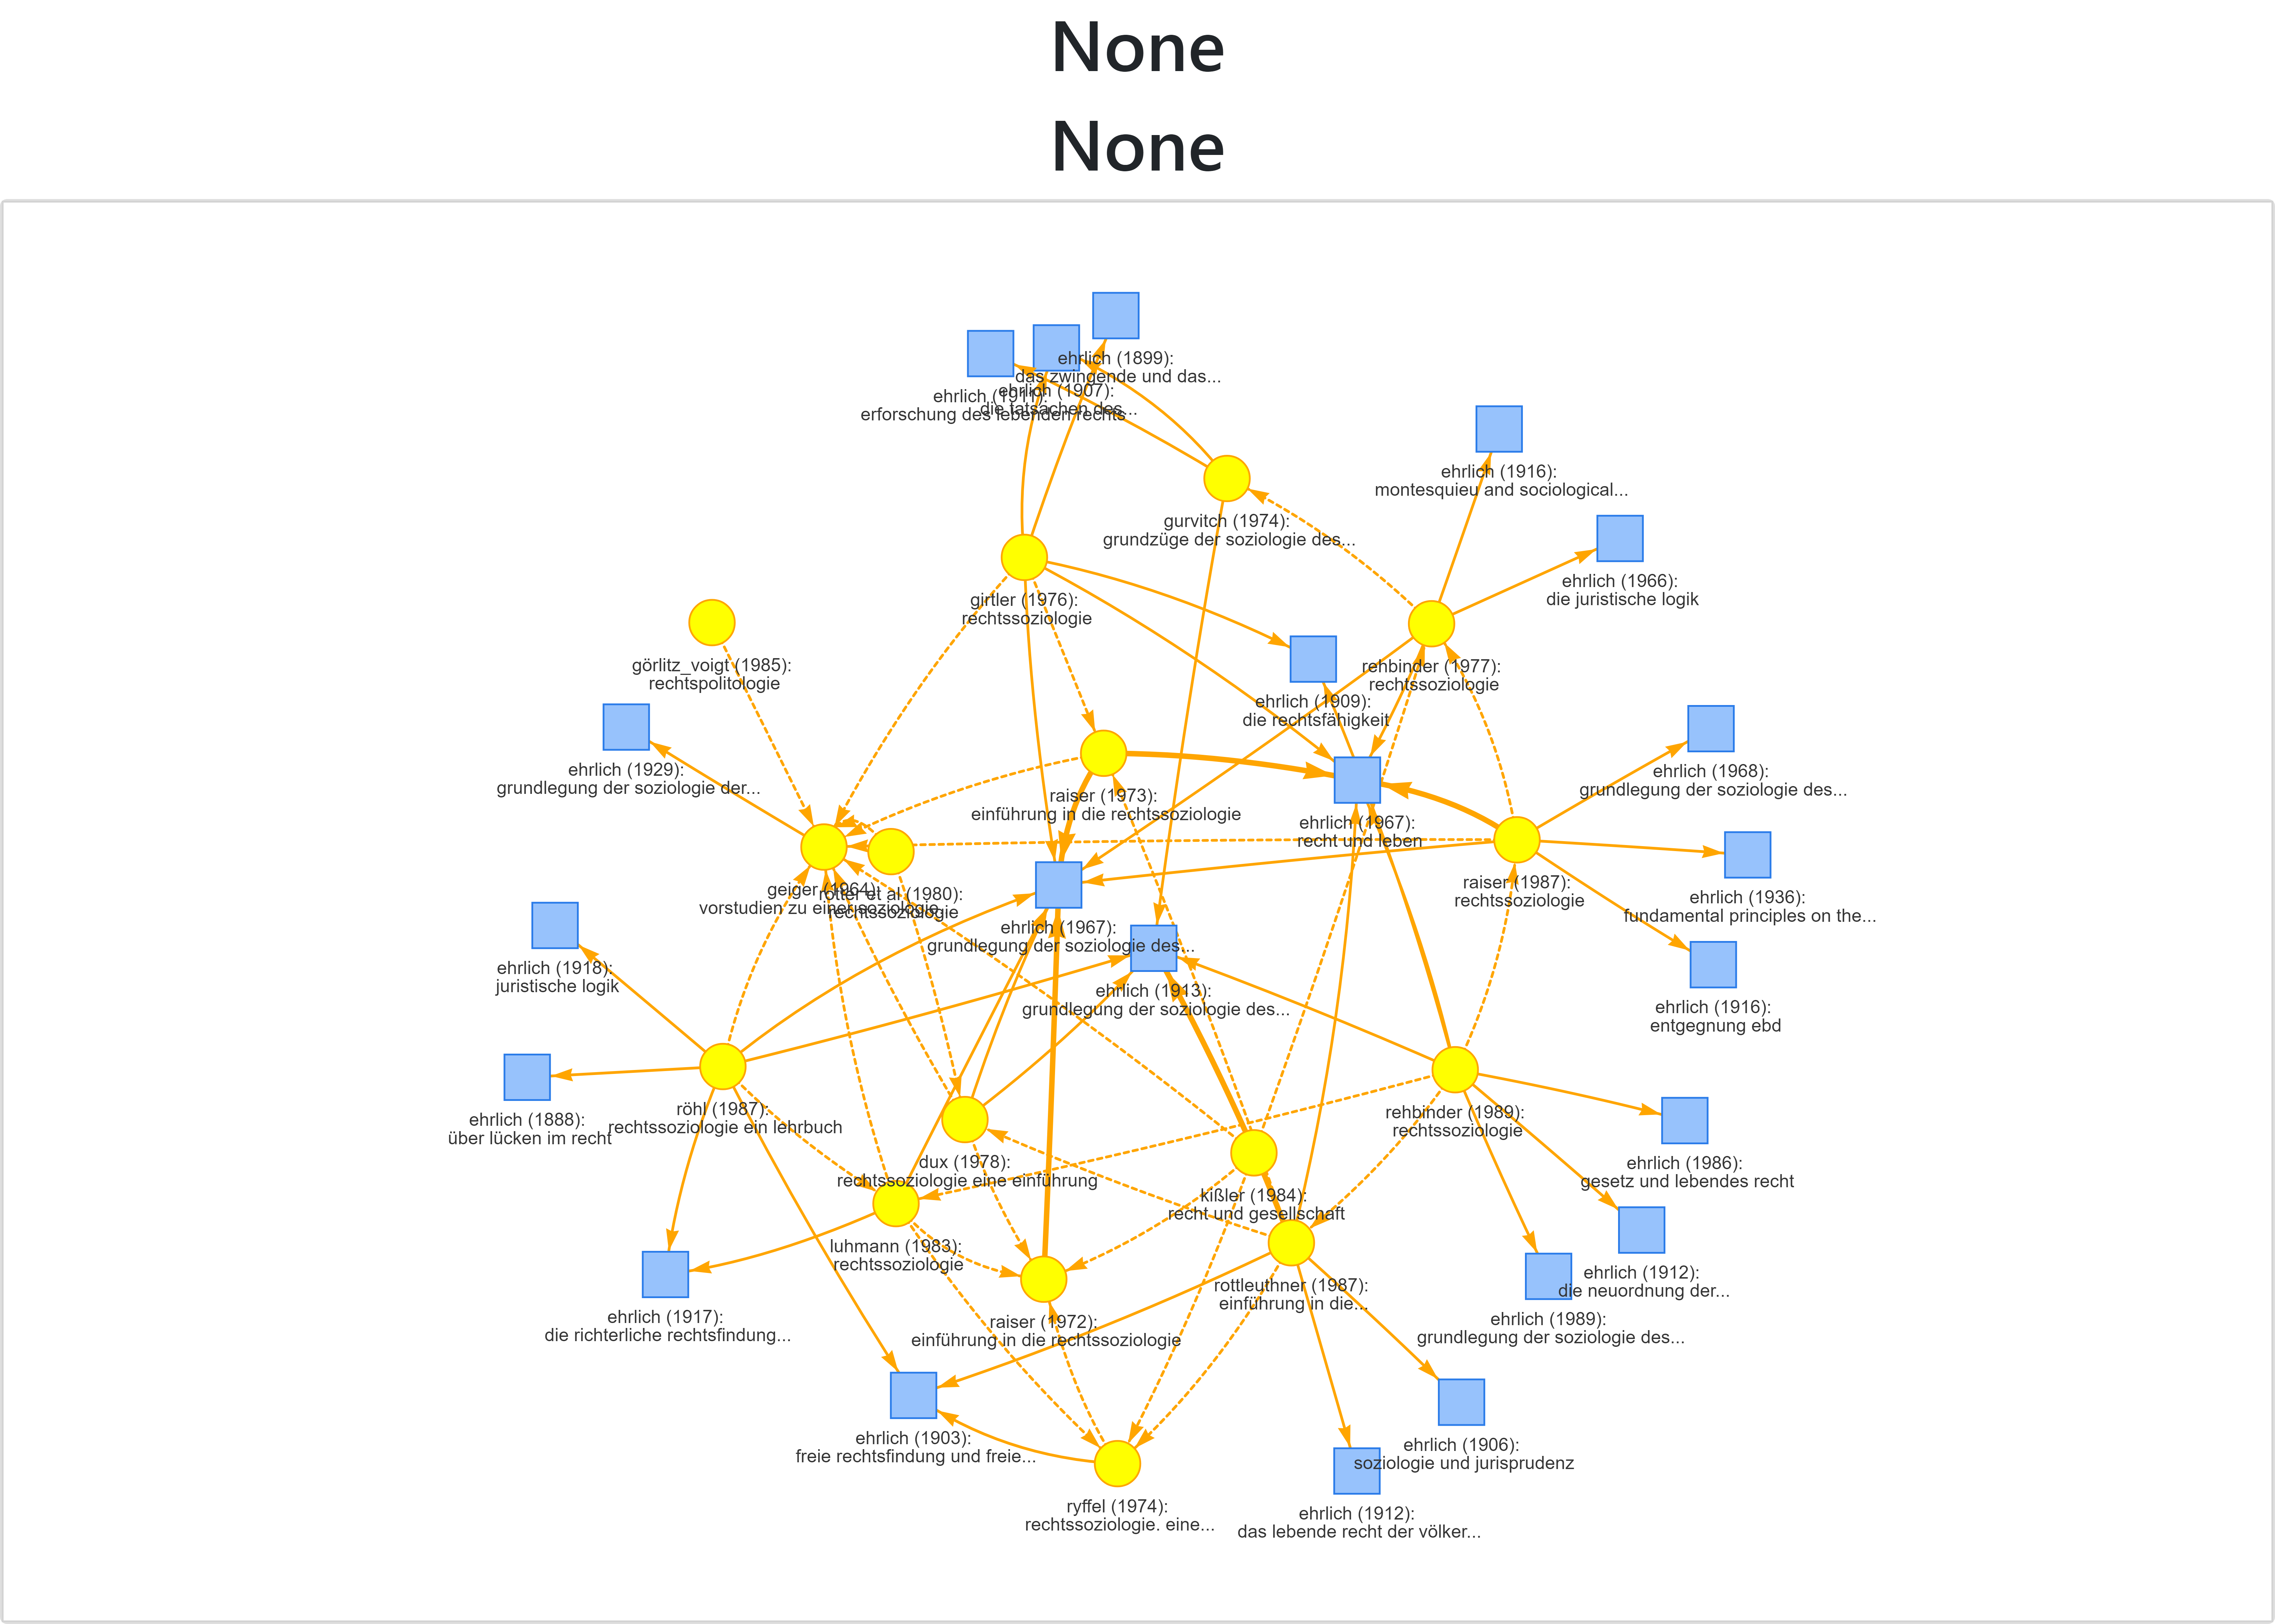

In [8]:
query="""
MATCH (a:Author)-[:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)
WHERE tolower(a.display_name) starts with "ehrlich, e"
SET w1.vis_shape = "square"
WITH w1, w2, r2
CALL {
  WITH w1, w2, r2
  OPTIONAL MATCH (w3:Work)-[r3:CITES]->(w2)
  OPTIONAL MATCH (w3)-[r4:CITES]->(w1)
  SET r2.vis_width = CASE
                     WHEN r3 IS NOT NULL AND r4 IS NOT NULL
                     THEN 6
                     ELSE 3
                   END
  WITH r3, r4
  RETURN r3, r4
}
WITH w1, w2, r2, r3, r4
// styling
SET w1.vis_group = "cited"
SET r3.vis_dashes = true
RETURN w1, w2, r2, r3, r4

"""
from scripts.pyvis import create_or_update_network, draw_network, cleanup
from scripts.utils import get_graph
graph = get_graph("rsoz-lehrbuecher")
net = create_or_update_network(graph, query, height="800px", seed=1)
draw_network(net,file="docs/14-rsoz-lehrbuecher-ehrlich-indirect-citations.html", screenshot=True)
cleanup(graph)

## Abbildung 15: Kozitationen in den Daten von openalex.org

In [1]:
query="""
MATCH (citingWork:Work)-[:CITES]->(citedWork:Work)<-[:CREATOR_OF]-(citedAuthor:Author),
      (citingWork)-[coCitation:CITES]->(coCitedWork:Work)<-[:CREATOR_OF]-(coCitedAuthor:Author)
where citedAuthor.display_name = "ehrlich, eugen"
    and coCitedAuthor.display_name <> ", "
    and citedAuthor <> coCitedAuthor
WITH citedAuthor, coCitedAuthor,
    COUNT(distinct coCitation) as coCitationCount,
    collect(distinct citedWork) as citedWorks,
    collect(distinct coCitedWork) as coCitedWorks,
    collect(DISTINCT citingWork.year) as citingWorkYears
where size(citingWorkYears) > 10
with citedAuthor, coCitedAuthor, coCitationCount, citedWorks, coCitedWorks
ORDER BY coCitationCount DESC
LIMIT 10
call {
    with citedWorks, coCitedWorks
    unwind citedWorks as citedWork
    unwind coCitedWorks as coCitedWork
    MATCH (citingWork:Work)-[:CITES]->(citedWork)
    where exists((citingWork)-[:CITES]->(coCitedWork))
    with citedWork, count(citedWork) as citedWorkCitedCount
    ORDER BY citedWorkCitedCount DESC
    LIMIT 1
    return citedWork as mostCitedCitedWork
}
call {
    with citedWorks, coCitedWorks
    unwind citedWorks as citedWork
    unwind coCitedWorks as coCitedWork
    MATCH (citingWork:Work)-[:CITES]->(coCitedWork)
    where exists((citingWork)-[:CITES]->(citedWork))
    with coCitedWork, count(coCitedWork) as coCitationCitedCount
    ORDER BY coCitationCitedCount DESC
    LIMIT 1
    return coCitedWork as mostCitedCoCitedWork
}
return coCitedAuthor.display_name as `Co-cited author`,
    coCitationCount as `Number of co-citations`,
    mostCitedCitedWork.display_name as `Most cited work of cited author`,
    mostCitedCoCitedWork.display_name as `Most cited work of co-cited author`
"""
from scripts.utils import get_graph, df_to_nice_html
from IPython.display import display_html
graph = get_graph("ehrlich-openalex")
df = graph.run(query).to_data_frame()
df_to_nice_html(df, file='docs/15-openalex-most-cocited-authors.html')
df

Co-cited author  Number of co-citations  \
0             teubner, gunther                     137   
1            cotterrell, roger                     102   
2             maccormick, neil                      94   
3           merry, sally engle                      89   
4               hart, h. l. a.                      89   
5           joerges, christian                      87   
6  de sousa santos, boaventura                      86   
7             habermas, jürgen                      83   
8                 kelsen, hans                      73   
9           tamanaha, brian z.                      71   

                     Most cited work of cited author  \
0  ehrlich (1989), grundlegung der soziologie des...   
1  ehrlich (1989), grundlegung der soziologie des...   
2  ehrlich (1916), montesquieu and sociological j...   
3  ehrlich (1989), grundlegung der soziologie des...   
4  ehrlich (1938), fundamental principles of the ...   
5  ehrlich (1916), montesquieu and sociological j...   
6  ehrlich (1989), grundlegung der soziologie des...   
7  ehrlich (1989), grundlegung der soziologie des...   
8  ehrlich (1916), montesquieu and sociological j...   
9  ehrlich (1938), fundamental principles of the ...   

                  Most cited work of co-cited author  
0  teubner (2003), legal irritants: good faith in...  
1  cotterrell (2015), does global legal pluralism...  
2      maccormick (1993), beyond the sovereign state  
3                      merry (1988), legal pluralism  
4  hart (1958), positivism and the separation of ...  
5  joerges (2011), a new type of conflicts law as...  
6  de sousa santos (1987), law: a map of misreadi...  
7  habermas (2008), the constitutionalization of ...  
8                  kelsen (1967), pure theory of law  
9  tamanaha (2001), a general jurisprudence of la...

## Abbildung 16: Kookkurrenzanalyse von "Ehrlich" im Lehrbuchkorpus (Textfenster: 30 Worte)

Analyzing article corpus:   0%|          | 0/19 [00:00<?, ?it/s]

Tokenizing and stemming...:   0%|          | 0/18 [00:00<?, ?it/s]

Analyzing co-occurring words...:   0%|          | 0/18 [00:00<?, ?it/s]

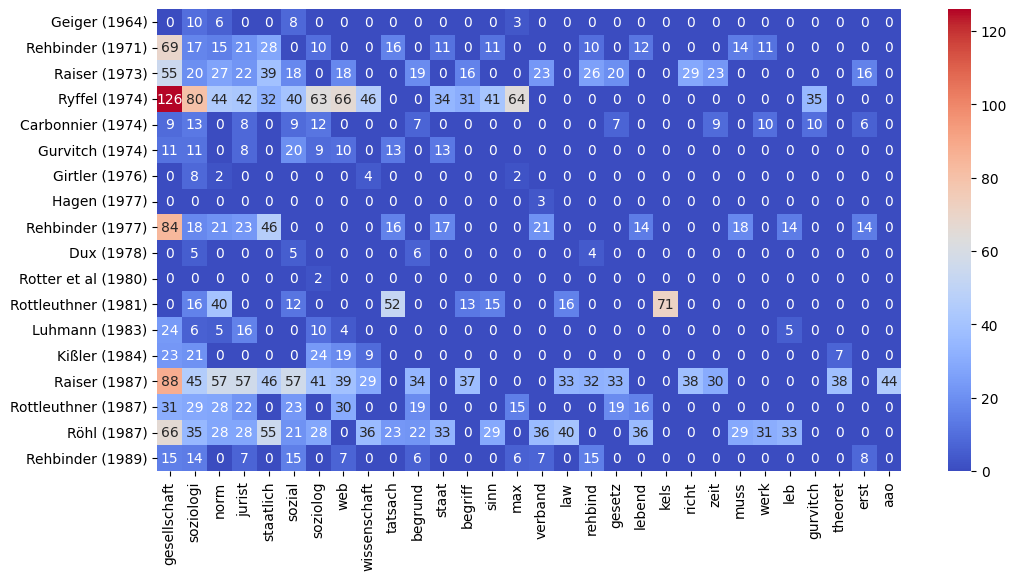

In [3]:
from scripts.utils import create_corpus
from scripts.cooccurrence import find_cooccurring_words, filter_df
import os
import pickle
import hashlib
from scripts.cooccurrence import filter_counters, create_heatmap

regex_find = r'\bEhrlichs?\b'
regex_ignore = r'Eugen|[Vv]gl|\bff\b|Rechts?|\b.{1,2}\b|Aufl\w*|\bsei\b|Anm\w*|Abschnitt|[Mm]uss\w*|[Aa]\. ?a. ?o\.'
default_language = 'german'
corpus_dir = os.getenv('CORPUS_BASE_DIR') + "/CORPORA/rsoz-lehrbuecher"

# cache or load results to speed up notebook generation
regex_hash = hashlib.md5(regex_find.encode()).hexdigest()[:5]
df_path = f"cache/{regex_hash}_df.pickle"
cooccurring_words_path = f"cache/{regex_hash}_cooccurring_words.pickle"
global_cooccurring_words_path = f"cache/{regex_hash}_global_cooccurring_words.pickle"

if not os.path.exists(df_path):
     df = filter_df(create_corpus(corpus_dir), regex_find)
     cooccurring_words, global_cooccurring_words = find_cooccurring_words(
          df, regex_find, default_language=default_language, ignore=regex_ignore)
     with open(df_path, "wb") as file:
          pickle.dump(df, file)
     with open(cooccurring_words_path, "wb") as file:
          pickle.dump(cooccurring_words, file)
     with open(global_cooccurring_words_path, "wb") as file:
          pickle.dump(global_cooccurring_words, file)
else:
     with open(df_path, "rb") as file:
          df = pickle.load(file)
     with open(cooccurring_words_path, "rb") as file:
          cooccurring_words = pickle.load(file)
     with open(global_cooccurring_words_path, "rb") as file:
          global_cooccurring_words = pickle.load(file)

filtered_counters = filter_counters(cooccurring_words, global_cooccurring_words,max_doc=20, max_global=300)
create_heatmap(df, filtered_counters, max_words=30, file="docs/16-rsoz-lehrbuecher-ehrlich-co-occurrence.png")

## Abbildung 17: Wortwolke zur Kookkurrenz „Ehrlich", Gesamtkorpus. Algorithmus Jänicke u. a. (2018). 

Die Wortwolke wurde mit der Anwendung [CorpusExplorer](https://notes.jan-oliver-ruediger.de/software/corpusexplorer-overview) erstellt. Sie wird hier lediglich in eine hochauflösende Bitmap-version für den Druck umgewandelt.


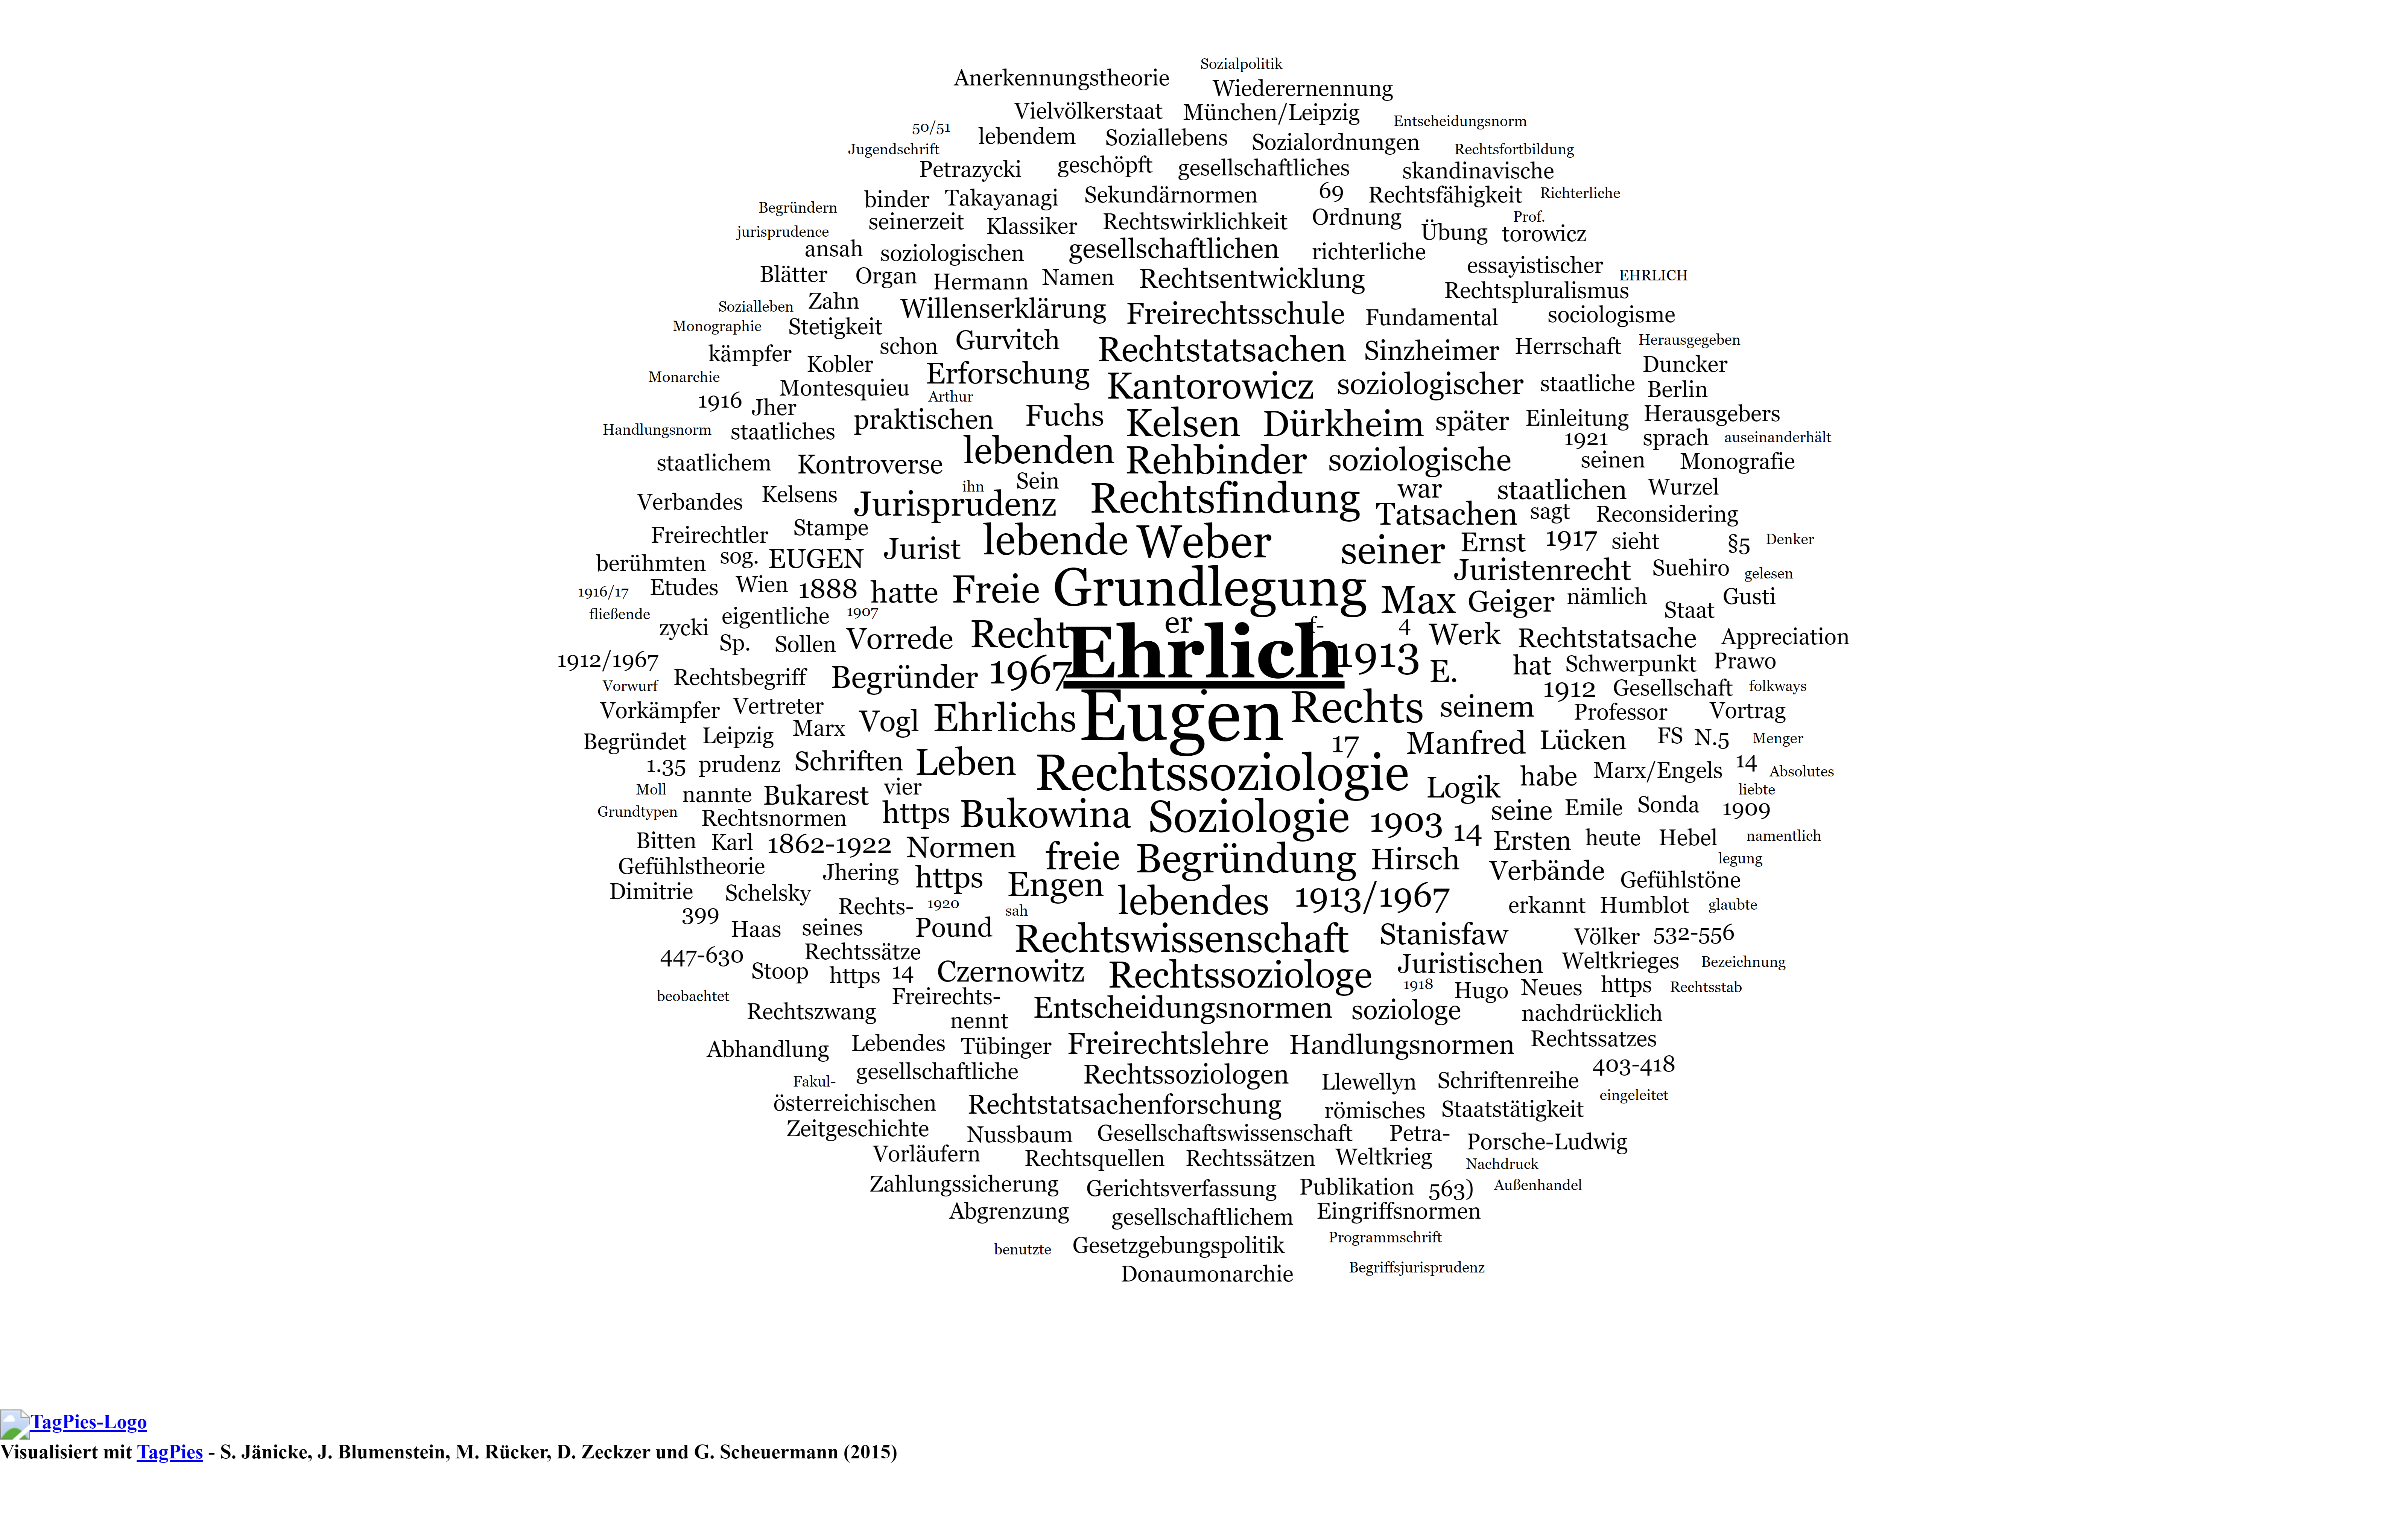

In [3]:
from scripts.pyvis import make_screenshot
from IPython.display import display, Image;
import shutil
import fileinput

# copy the original file
shutil.copy('data/ehrlich-wordcloud.html', 'docs/17-ehrlich-wordcloud.html')
# replace orange with black for printing
with fileinput.input(files=('docs/17-ehrlich-wordcloud.html',), inplace=True) as f:
     for line in f:
          print(line.replace("#d95f02", "#000000"), end='')
# make screenshot
make_screenshot('docs/17-ehrlich-wordcloud.html', scale_factor=5, run_javascript="", delay=5000)
# display here
display(Image('docs/17-ehrlich-wordcloud.png'))

## Abbildung 18: Zitierte Werke (Zeitreihe, Quelle: openalex.org)

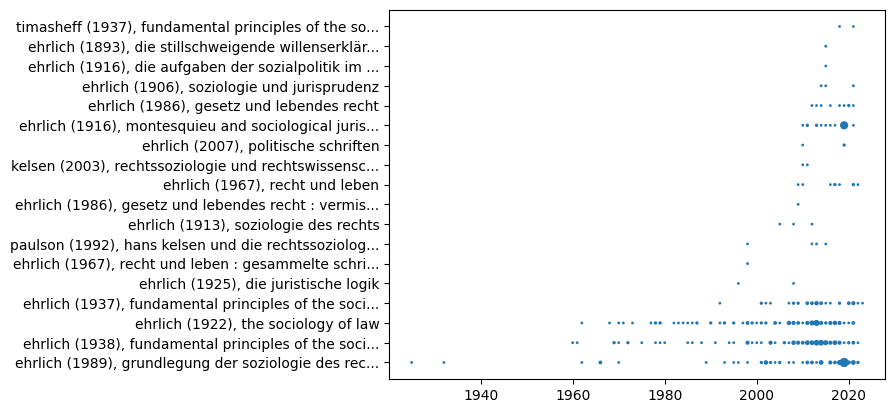

In [4]:
query = """
MATCH (citingWork:Work)-[r:CITES]->(citedWork:Work)<-[:CREATOR_OF]-(citedAuthor:Author)
WHERE citedAuthor.display_name = "ehrlich, eugen"
RETURN citedWork.display_name as work, citingWork.year as year, count(*) as citations
ORDER BY year
"""
from scripts.n4j_plotlib import plot_year_citations
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
data = graph.run(query).data()
plot_year_citations(data, dep_col='work', file="docs/18-openalex-ehrlich-cited-works-timeseries.png")

## Abbildung 19: „Lebendes Recht“ und „Eugen Ehrlich“ im Google-Books-Korpus „German (2019)“

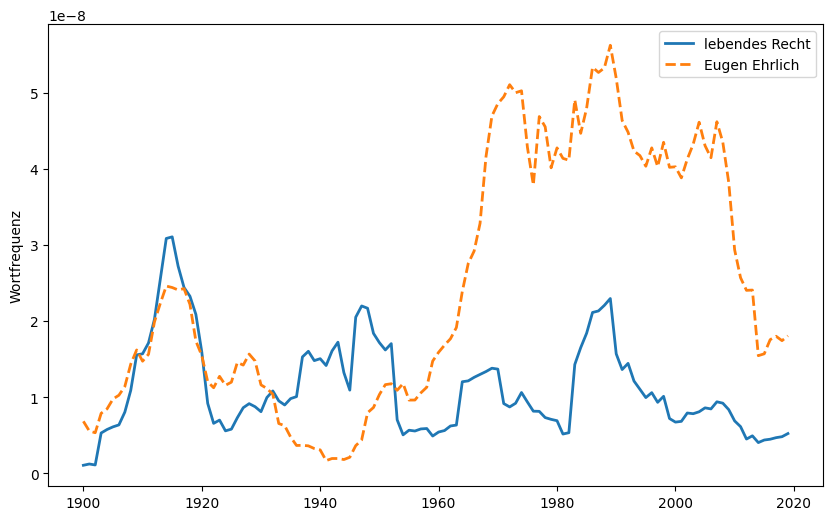

In [5]:
from lib.google_ngram import plot
plot(ylabel="Wortfrequenz",
     file='docs/19-google-ngram-de-lebendes-recht-ehrlich.png',
     content='lebendes Recht,Eugen Ehrlich',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='de-2019')

## Abbildung 20: „living law“ und „Eugen Ehrlich“ im Google-Books-Korpus „English (2019)“

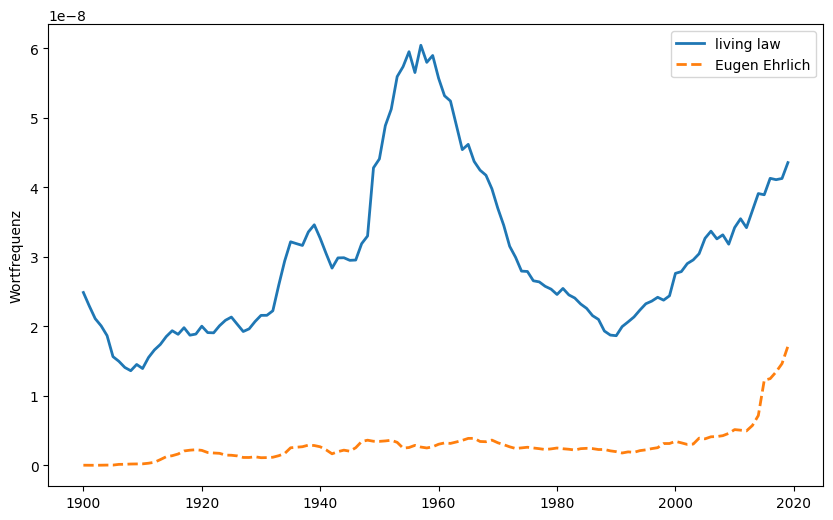

In [6]:
from lib.google_ngram import plot
plot(ylabel="Wortfrequenz",
     file='docs/20-google-ngram-en-living-law-ehrlich.png',
     content='living law,Eugen Ehrlich',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='en-2019')